    
<h1 align="center">Health Insurance Charges Pridction </h0> 
<br>



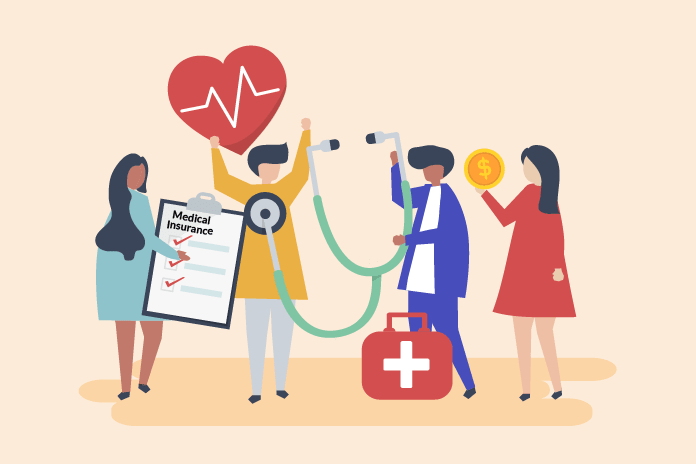

### **About The Dataset**
>* This data is from US situated health insurance company about their coustomers.<br>
>* It consists of 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: 
>>* Age
>>* Sex
>>* BMI
>>* Number of Children
>>* Smoker
>>* Region


### **Assignment Submitted By-**<br>
>* Rachit Goyal (101918056) <br>
>* Shouraya Goyal (101918064) <br>
>* CSBS-3

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

### Importing Dataset

In [2]:
df = pd.read_csv("insurance.csv.xls",sep = ",")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f"Rows in dataset are : {df.shape[0]} \nColumns in dataset are : {df.shape[1]}")

Rows in dataset are : 1338 
Columns in dataset are : 7


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()
# there are no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Data Analysis


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


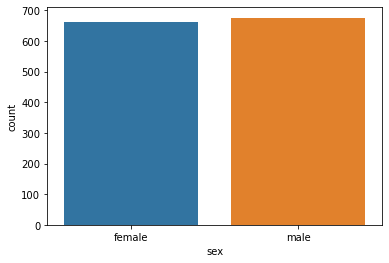

In [11]:
sns.countplot(x='sex',data=df)
plt.show()

> **conclusion :** we have equal male to female customer ratio.

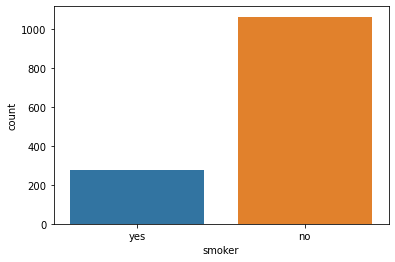

In [12]:
sns.countplot(x='smoker',data =df)
plt.show()

> **conclusion :** maximum customers do not prefer smoking.

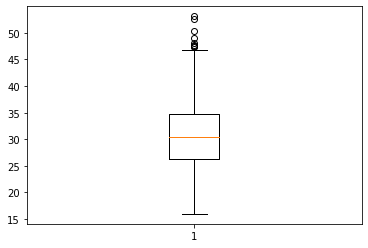

In [13]:
plt.boxplot(df['bmi'])
plt.show()

* **checking for BMI outliers**

In [71]:
df[df['bmi']>47].describe()

,age,bmi,children,charges
count,9.000000,9.000000,9.000000,9.000000
mean,39.666667,49.276667,0.888889,21848.215134
std,15.223337,2.242304,0.781736,23085.711786
min,18.000000,47.410000,0.000000,1163.462700
25%,23.000000,47.600000,0.000000,8083.919800
50%,46.000000,48.070000,1.000000,9748.910600
75%,52.000000,50.380000,1.000000,44501.398200
max,58.000000,53.130000,2.000000,63770.428010


In [72]:
print(f"Rows in dataset are : {df.shape[0]}")

Rows in dataset are : 1338


In [73]:
p=(5/1338)*100
print(f"Percentage of rows having BMI greater than 50 is {p} ")

Percentage of rows having BMI greater than 50 is 0.37369207772795215 


As the percentage is **0.373%**. So, we can remove the rows from the table as it would not lead to reduction in richness of the data

* **Droping The BMI Outliers** 


In [74]:
df.drop(df[df['bmi']>47].index,inplace=True)

In [75]:
df[df['bmi']>47].describe()

,age,bmi,children,charges
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [76]:
print(f" Total number of rows after droping the outliers {df.shape[0]}")

 Total number of rows after droping the outliers 1329


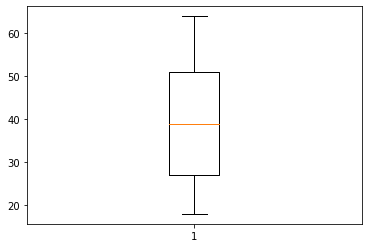

In [77]:
plt.boxplot(df["age"])
plt.show()

**Conclusion :** *Age has no Outliers*

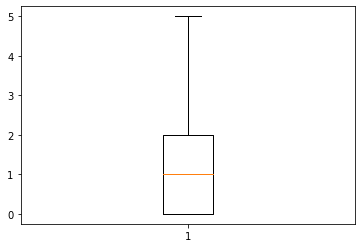

In [78]:
plt.boxplot(df["children"])
plt.show()

**Conclusion :** *Children attribute has no Outliers*

In [79]:
df.groupby("region")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,323.0,29.115000,5.852451,15.960,24.8425,28.88,32.8225,44.745
northwest,325.0,29.199785,5.136765,17.385,25.7450,28.88,32.7750,42.940
southeast,357.0,33.035742,6.110591,19.800,28.3800,33.33,37.5100,46.750
southwest,324.0,30.544136,5.621338,17.400,26.8750,30.25,34.6000,46.700


 **Conclusion :** customers of southeast region have greater BMI in comparision to other regions.

In [80]:
df.groupby("region")["children"].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,323.0,1.043344,1.199629,0.0,0.0,1.0,2.0,5.0
northwest,325.0,1.147692,1.171828,0.0,0.0,1.0,2.0,5.0
southeast,357.0,1.058824,1.184835,0.0,0.0,1.0,2.0,5.0
southwest,324.0,1.138889,1.277030,0.0,0.0,1.0,2.0,5.0


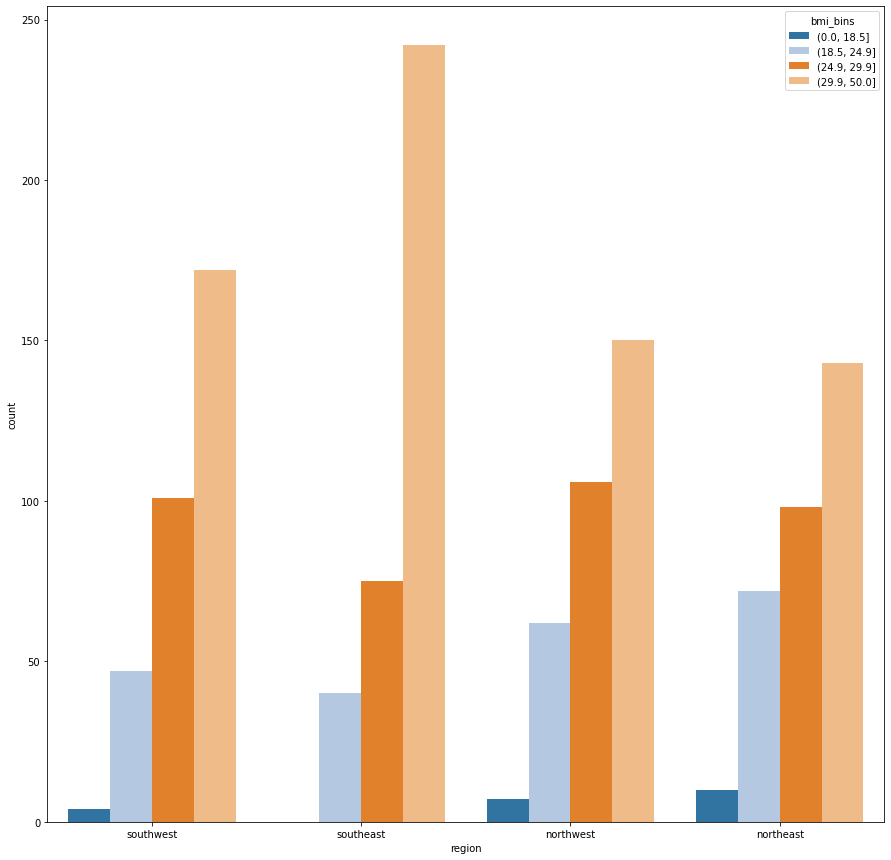

In [81]:
plt.figure(figsize=(15,15))
df["bmi_bins"] = pd.cut(df["bmi"], bins=[0,18.5,24.9,29.9,50])
sns.countplot(x= df["region"],hue = df["bmi_bins"],palette="tab20")
plt.show()

**Conclusion :** <br>
* coustomers belonging to southeast region have an unhealthy eating lifestyle.<br>
* coustomer belonging to northwest and northeast have approximately similar kind of eating lifestyle<br>

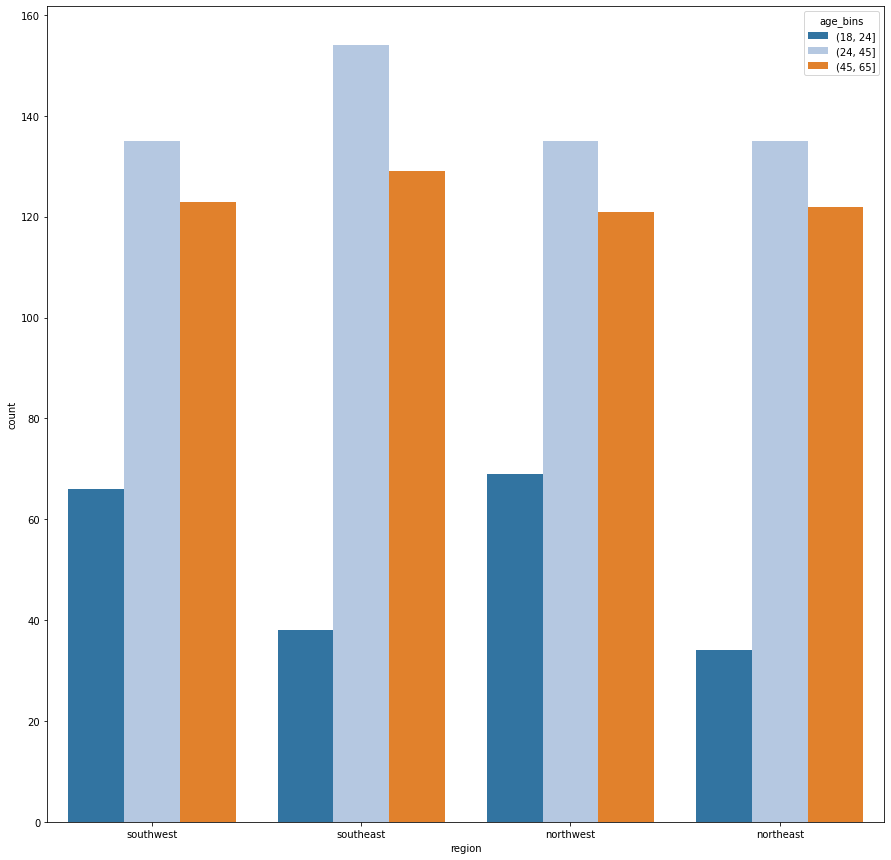

In [82]:
plt.figure(figsize=(15,15))
df["age_bins"] = pd.cut(df["age"], bins=[18,24,45,65])
sns.countplot(x = df["region"],hue = df["age_bins"],palette="tab20")
plt.show()

**Conclusion :** <br>
* Maximum customers from all the regions belong to young age group(24-45years) ,followed by middle age group     (45-65years) and then youths(18-24years).<br>
* Youth customer are maximum in norethwest region followed by southwest rgion ,southeast region and northeast region.
* Young  aged customer are maximum in southwest region <br>
* Middle aged customer are maximum in southwest region.<br>

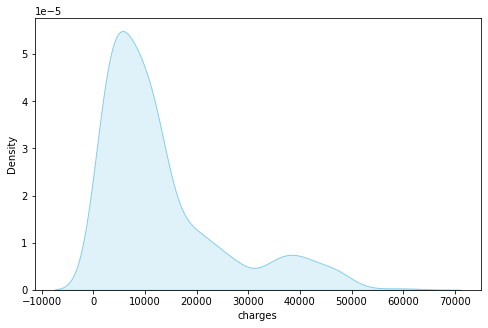

In [83]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df.charges,fill=True,color="skyblue")
plt.show()

**Conclusion :** Maximum coustomer insurance charges are in less than 12K.

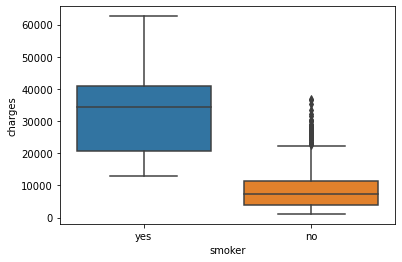

In [84]:
sns.boxplot(x = df["smoker"],y = df["charges"],palette="tab10")
plt.show()

**Conclusion :** Average insurance charges for customers who prefer smoking is very higher in comparision to customers who do not prefer smoking. 

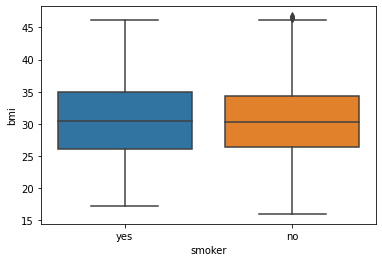

In [85]:
sns.boxplot(x = df["smoker"],y = df["bmi"],palette="tab10")
plt.show()

<AxesSubplot:xlabel='bmi_bins', ylabel='charges'>

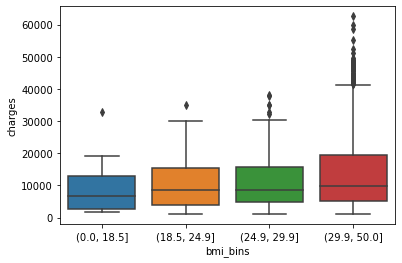

In [86]:
sns.boxplot(x = df["bmi_bins"],y = df["charges"],palette="tab10")

**Conclusion :** *BMI is directly proportional to insurance charges*

age         7
sex         7
bmi         7
children    7
smoker      7
region      7
charges     7
bmi_bins    7
age_bins    7
dtype: int64

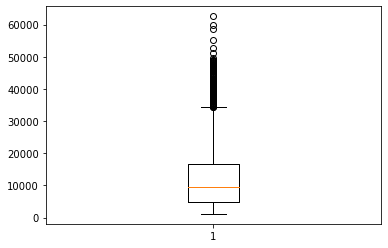

In [87]:
plt.boxplot(df['charges'])
df[df["charges"]>49000].count()

In [88]:
df.drop(df[df["charges"]>49000].index,inplace=True)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

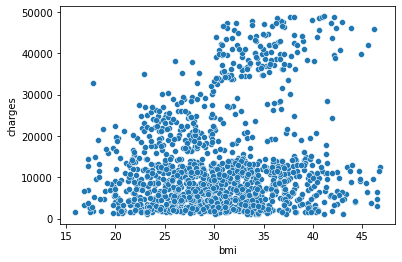

In [89]:
sns.scatterplot(x=df['bmi'], y=df['charges'])

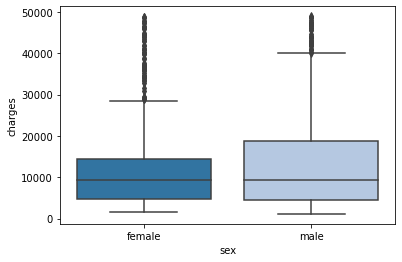

In [90]:
sns.boxplot(x = df["sex"],y = df["charges"],palette="tab20")
plt.show()

**Conclusion :** *Average insurance charges of Males are greater as compared to Females*

<AxesSubplot:xlabel='sex', ylabel='count'>

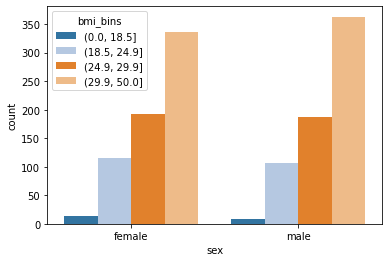

In [91]:
sns.countplot(x = df["sex"],hue = df["bmi_bins"],palette="tab20")

**Conclusion :** *BMI has no corelation with sex*

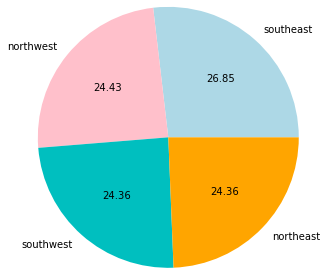

In [92]:
df.region.value_counts()
plt.pie([355,323,322,322],labels =["southeast","northwest","southwest","northeast"],shadow = True==False ,radius=1.5,autopct="%.2F",colors=["lightblue","pink","c","orange"])
plt.show()

## Data Preprocessing

> Categorical Variables
>> Smoker
>> Sex
>> Region


In [93]:
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
charges      float64
bmi_bins    category
age_bins    category
dtype: object

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
array=df[["age","bmi","children","charges"]]
scale = StandardScaler()
df_scaled=scale.fit_transform(array)
df1 = pd.DataFrame(df_scaled, columns=list(array),index=array.index)

In [95]:
df_cat = df[["sex","region","smoker"]]
df_cat = pd.get_dummies(df_cat)
df_final = df1.join(df_cat)

In [96]:
df_final

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,-1.436953,-0.441409,-0.907858,0.335579,1,0,0,0,0,1,0,1
1,-1.508178,0.549821,-0.080142,-0.969692,0,1,0,0,1,0,1,0
2,-0.795925,0.419796,1.575290,-0.735155,0,1,0,0,1,0,1,0
3,-0.439798,-1.318656,-0.907858,0.774666,0,1,0,1,0,0,1,0
4,-0.511023,-0.275923,-0.907858,-0.785319,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.771033,0.077002,1.575290,-0.205526,0,1,0,1,0,0,1,0
1334,-1.508178,0.237423,-0.907858,-0.928326,1,0,1,0,0,0,1,0
1335,-1.508178,1.069921,-0.907858,-0.977934,1,0,0,0,1,0,1,0
1336,-1.294502,-0.796023,-0.907858,-0.945377,1,0,0,0,0,1,1,0


<AxesSubplot:>

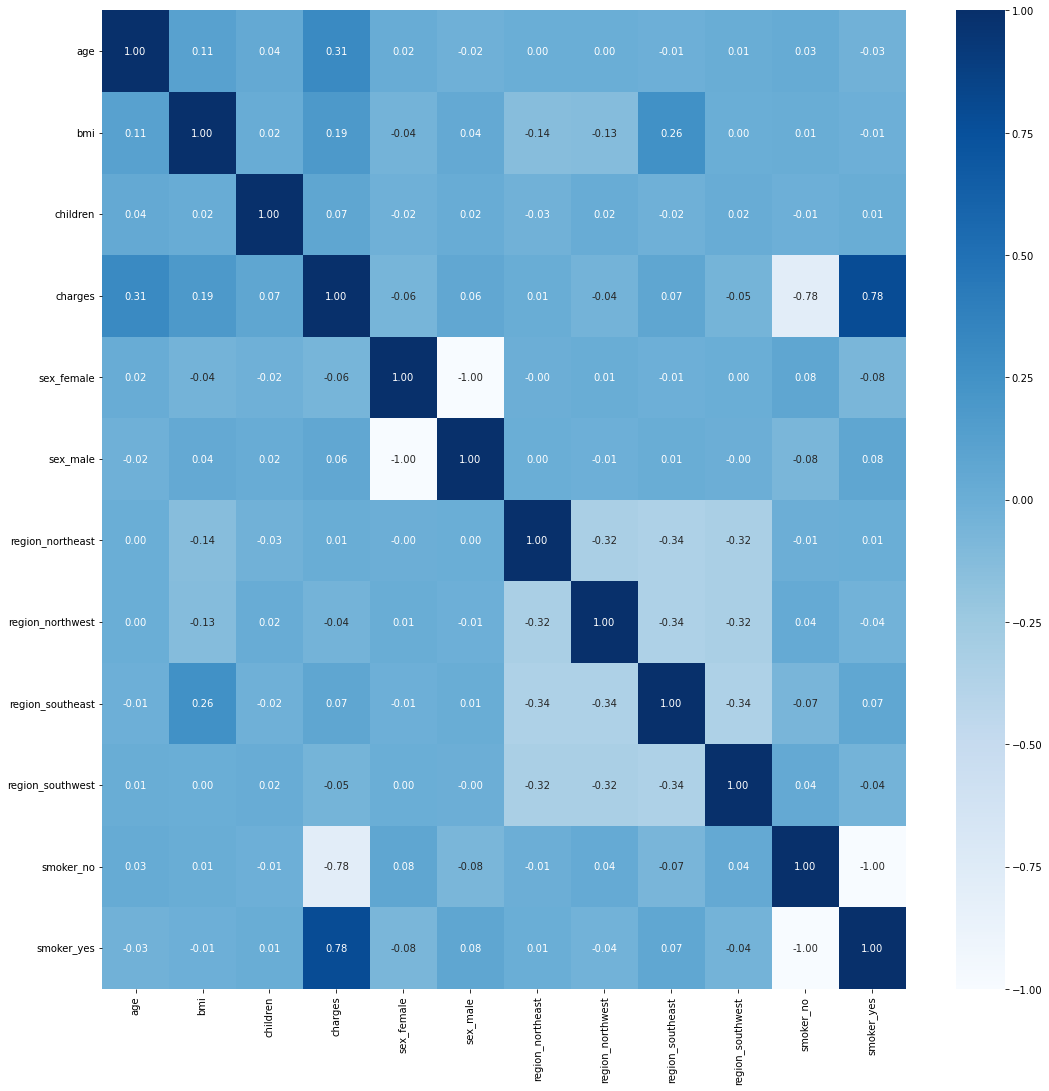

In [97]:
cor1 = df_final.corr()
plt.figure(figsize =(18,18))
sns.heatmap(cor1,annot=True,fmt=".2f",cmap ="Blues")


In [98]:
Df_cat = df[["sex","region","smoker"]]
Df_cat = pd.get_dummies(Df_cat,drop_first=True)
DF = df1.join(Df_cat)

<AxesSubplot:>

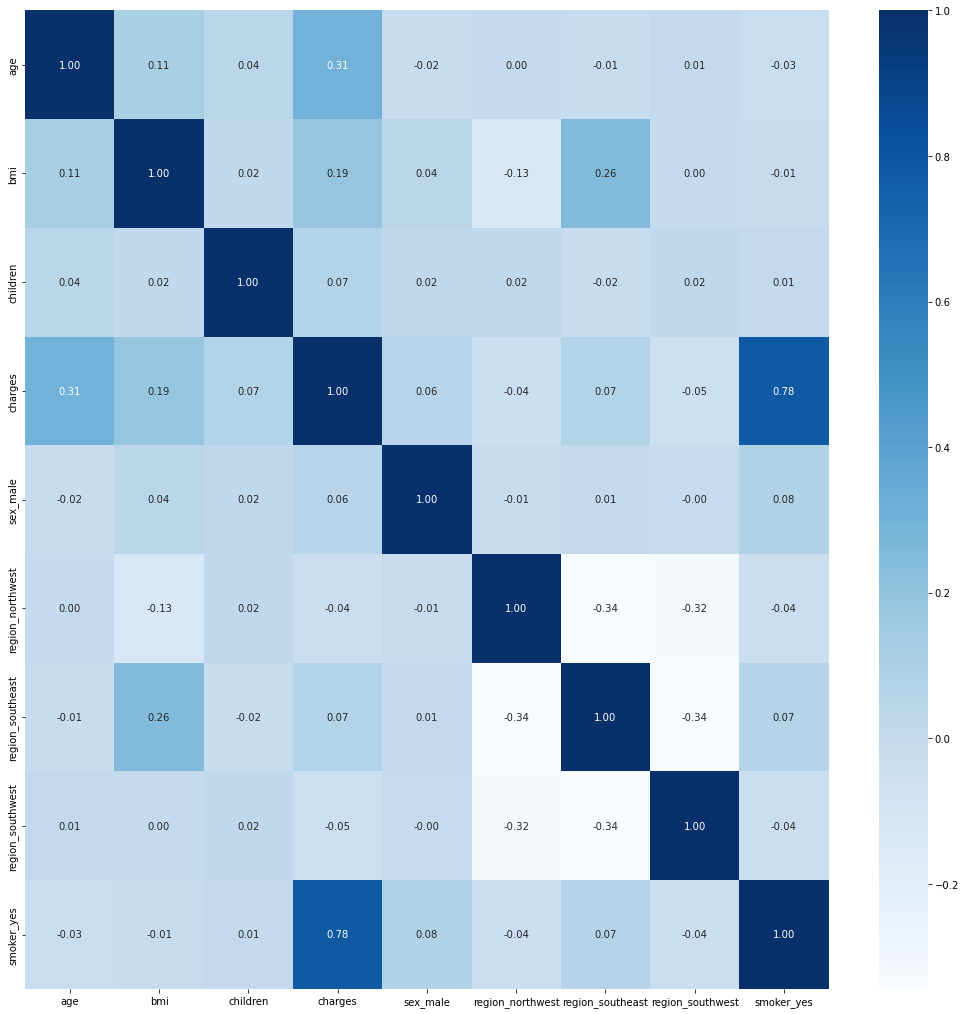

In [99]:
cor2 = DF.corr()
plt.figure(figsize =(18,18))
sns.heatmap(cor2,annot=True,fmt=".2f",cmap ="Blues")

In [100]:
DF.dtypes

age                 float64
bmi                 float64
children            float64
charges             float64
sex_male              uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
smoker_yes            uint8
dtype: object

In [101]:
DF.rename(columns = {"sex_male":"male","smoker_yes":"smoker"},inplace = True)

In [102]:
DF.head(5)

,age,bmi,children,charges,male,region_northwest,region_southeast,region_southwest,smoker
0,-1.436953,-0.441409,-0.907858,0.335579,0,0,0,1,1
1,-1.508178,0.549821,-0.080142,-0.969692,1,0,1,0,0
2,-0.795925,0.419796,1.575290,-0.735155,1,0,1,0,0
3,-0.439798,-1.318656,-0.907858,0.774666,1,1,0,0,0
4,-0.511023,-0.275923,-0.907858,-0.785319,1,1,0,0,0


In [103]:
# DF.drop(["children","male","region_northwest","region_southeast","region_southwest","bmi"],axis = 1,inplace=True)
DF.head()

,age,bmi,children,charges,male,region_northwest,region_southeast,region_southwest,smoker
0,-1.436953,-0.441409,-0.907858,0.335579,0,0,0,1,1
1,-1.508178,0.549821,-0.080142,-0.969692,1,0,1,0,0
2,-0.795925,0.419796,1.575290,-0.735155,1,0,1,0,0
3,-0.439798,-1.318656,-0.907858,0.774666,1,1,0,0,0
4,-0.511023,-0.275923,-0.907858,-0.785319,1,1,0,0,0


In [104]:
north_east = df.region.value_counts().sum() - (DF[DF["region_northwest"] == 1].value_counts().sum() + DF[DF["region_southwest"] == 1].value_counts().sum() + DF[DF["region_southeast"] == 1].value_counts().sum())

### Model Fitting

* **Splitting The Dataset into Test and Train data**

In [105]:
target = DF["charges"].copy()
DF = DF.drop("charges",axis = 1)
x_train, x_test, y_train, y_test = train_test_split(DF,target, test_size = 0.3, random_state = 42)

In [106]:
def errorScore(model,x_train,y_train,x_test,y_test):
    y_pred = model.predict(x_test)
    train_error = model.score(x_train,y_train)
    test_error = model.score(x_test,y_test)
    rms_error = mean_squared_error(y_test,y_pred)
    df_result = pd.DataFrame({'predicted':y_pred},index=y_test.index)
    df_res = pd.DataFrame({'charges':y_test},index=y_test.index)
    df_result = x_test[['smoker', 'male','bmi']].join(df_result)
    df_result = df_result.join(df_res)
    rsquare = r2_score(df_result["predicted"],df_result["charges"])
    return train_error,test_error,rms_error,rsquare

In [107]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
train_error,test_error,rms_error,rsquare = errorScore(lin_reg,x_train,y_train,x_test,y_test) 
print(f"Train Accuracy : {train_error}\nTest Accuracy : {test_error}\nRMS Error : {rms_error}\nR2 Score : {rsquare}")

Train Accuracy : 0.7607428088799353
Test Accuracy : 0.7247151307260887
RMS Error : 0.25715957755179114
R2 Score : 0.6473593867374765


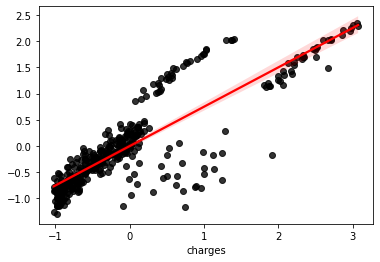

In [108]:
y_pred = lin_reg.predict(x_test)
sns.regplot(x=y_test,y=y_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()


In [109]:
from sklearn import tree

In [110]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
train_error,test_error,rms_error,rsquare = errorScore(tree_reg,x_train,y_train,x_test,y_test) 
print(f"Train Accuracy : {train_error}\nTest Accuracy : {test_error}\nRMS Error : {rms_error}\nR2 Score : {rsquare}")

Train Accuracy : 1.0
Test Accuracy : 0.7072045192176398
RMS Error : 0.2735172563085763
R2 Score : 0.7274467778897988


In [111]:
# plt.figure(figsize=(200,200))
# tree.plot_tree(tree_reg);

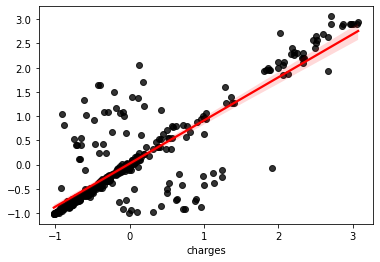

In [112]:
y_pred1 = tree_reg.predict(x_test)
sns.regplot(x=y_test,y=y_pred1,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

In [113]:
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(x_train,y_train)
train_error,test_error,rms_error,rsquare = errorScore(forest_reg,x_train,y_train,x_test,y_test) 
print(f"Train Accuracy : {train_error}\nTest Accuracy : {test_error}\nRMS Error : {rms_error}\nR2 Score : {rsquare}")

Train Accuracy : 0.9763555731506163
Test Accuracy : 0.8415624020268517
RMS Error : 0.14800575807366614
R2 Score : 0.8275323057032554


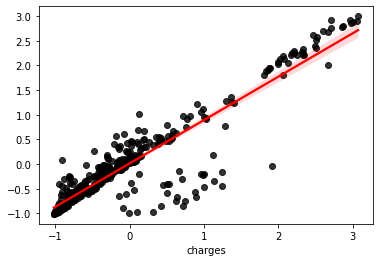

In [114]:
y_pred2 = forest_reg.predict(x_test)
sns.regplot(x=y_test,y=y_pred2,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
